In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Acquisition and Inspection: 


In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/crash-dataset/Crash_Reporting_-_Drivers_Data.csv',low_memory=False)


In [3]:
# get first 10 records of dataset
print(data.head(3))

  Report Number Local Case Number                Agency Name  \
0    DM8479000T         210020119  Takoma Park Police Depart   
1   MCP2970000R          15045937                 MONTGOMERY   
2   MCP20160036         180040948   Montgomery County Police   

        ACRS Report Type         Crash Date/Time Route Type Route Type.1  \
0  Property Damage Crash  05/27/2021 07:40:00 PM        NaN          NaN   
1  Property Damage Crash        09-11-2015 13:29        NaN          NaN   
2  Property Damage Crash  08/17/2018 02:25:00 PM        NaN          NaN   

  Cross-Street Name               Off-Road Description Municipality  ...  \
0               NaN                     IN PARKING LOT          NaN  ...   
1               NaN    Parking Lot: \n2525 Ennalls Ave          NaN  ...   
2               NaN  PARKING LOT OF 16246 FREDERICK RD          NaN  ...   

  Vehicle Going Dir Speed Limit Driverless Vehicle Parked Vehicle  \
0               NaN           0                 No            Ye

In [4]:
# get all the columns
data.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Route Type.1', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault',
       'Injury Severity', 'Circumstance', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Vehicle Model', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191209 entries, 0 to 191208
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  191209 non-null  object 
 1   Local Case Number              191209 non-null  object 
 2   Agency Name                    191209 non-null  object 
 3   ACRS Report Type               191209 non-null  object 
 4   Crash Date/Time                191209 non-null  object 
 5   Route Type                     172521 non-null  object 
 6   Route Type.1                   172521 non-null  object 
 7   Cross-Street Name              163302 non-null  object 
 8   Off-Road Description           17650 non-null   object 
 9   Municipality                   19126 non-null   object 
 10  Related Non-Motorist           6155 non-null    object 
 11  Collision Type                 190624 non-null  object 
 12  Weather                       

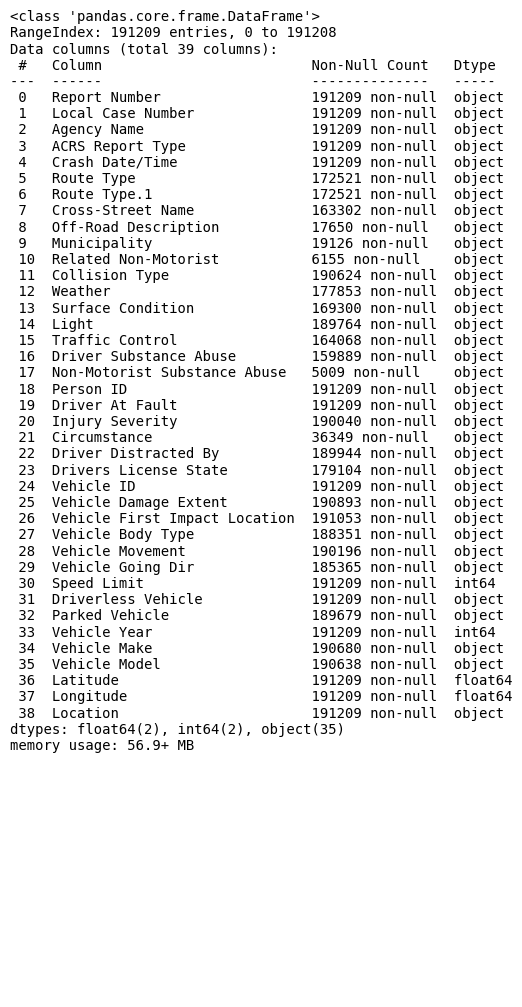

In [5]:
# print information about each column with datatypes
import io
x=pd.DataFrame(data.info())
# Capture df.info() output
buffer = io.StringIO()
data.info(buf=buffer)
info_str = buffer.getvalue()

# Convert text to image
plt.figure(figsize=(6, 3))
plt.text(0, 1, info_str, fontsize=10, family="monospace")
plt.axis("off")
plt.savefig("df_info.png", dpi=300, bbox_inches="tight")

print("DataFrame info saved as Image: df_info.png")

### we can observe most of the data columns are object type and rest are numeric

In [6]:
# print the number of rows and columns
rows_length, column_length=data.shape

# Data Cleaning and Preparation

In [7]:
# find number of empty rows in each column
data.isnull().sum()

Report Number                         0
Local Case Number                     0
Agency Name                           0
ACRS Report Type                      0
Crash Date/Time                       0
Route Type                        18688
Route Type.1                      18688
Cross-Street Name                 27907
Off-Road Description             173559
Municipality                     172083
Related Non-Motorist             185054
Collision Type                      585
Weather                           13356
Surface Condition                 21909
Light                              1445
Traffic Control                   27141
Driver Substance Abuse            31320
Non-Motorist Substance Abuse     186200
Person ID                             0
Driver At Fault                       0
Injury Severity                    1169
Circumstance                     154860
Driver Distracted By               1265
Drivers License State             12105
Vehicle ID                            0


#### **Find the duplicate rows in dataset**

In [8]:
# Remove duplicate rows
df = data.drop_duplicates()
new_row_length,_=df.shape
print("Number of duplicate rows after dropping duplicates:",new_row_length)
print("Number of rows dropped:", rows_length-new_row_length)
# Reset the index after dropping duplicates
df = df.reset_index(drop=True)
df.shape

Number of duplicate rows after dropping duplicates: 191209
Number of rows dropped: 0


(191209, 39)

In [9]:
# Transpose the DataFrame, drop duplicate rows (now columns), and transpose it back
df.drop(['Route Type.1','Report Number','Local Case Number'],axis=1,inplace=True)
df.shape

(191209, 36)

### one column contains mostly similar values so we dropped that column

## Replace na values with "unknown" words

#### Find the numeric columns and replace them with the mean

In [10]:
# numeric columns
numericColumns=df.select_dtypes(include="number")
numericColumns.columns,numericColumns

(Index(['Speed Limit', 'Vehicle Year', 'Latitude', 'Longitude'], dtype='object'),
         Speed Limit  Vehicle Year   Latitude  Longitude
 0                 0          2017  38.987657 -76.987545
 1                 5          2012  39.039917 -77.053649
 2                15          2015  38.743373 -77.546997
 3                15          2018  39.145873 -77.191940
 4                35          2017  39.025170 -77.076333
 ...             ...           ...        ...        ...
 191204           40          2006  39.237760 -77.278132
 191205           30          2019  39.015534 -77.042577
 191206           25          2005  38.992523 -77.036283
 191207           25          1999  38.977535 -77.077075
 191208           50          2018  39.052584 -76.977571
 
 [191209 rows x 4 columns])

In [11]:
# numeric columns with na values
columns_= df[numericColumns.columns].isnull().sum()
columns_

Speed Limit     0
Vehicle Year    0
Latitude        0
Longitude       0
dtype: int64

###  we can observe the numeric columns doesnot have the empty values

### Handling missing values in object  type

In [12]:
# object type columns
objectColumns=df.select_dtypes(include="object")
objectColumnsNames=objectColumns.columns

objectColumns

,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,...,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Going Dir,Driverless Vehicle,Parked Vehicle,Vehicle Make,Vehicle Model,Location
0,Takoma Park Police Depart,Property Damage Crash,05/27/2021 07:40:00 PM,NaN,NaN,IN PARKING LOT,NaN,NaN,OTHER,CLEAR,...,SUPERFICIAL,ONE OCLOCK,OTHER,PARKED,NaN,No,Yes,HINO,TWK,"(38.98765667, -76.987545)"
1,MONTGOMERY,Property Damage Crash,09-11-2015 13:29,NaN,NaN,Parking Lot: \n2525 Ennalls Ave,NaN,NaN,OTHER,CLEAR,...,UNKNOWN,UNKNOWN,PASSENGER CAR,PARKING,South,No,No,TOYOTA,SU,"(39.03991652, -77.05364898)"
2,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,NaN,OTHER,CLEAR,...,NO DAMAGE,SIX OCLOCK,PASSENGER CAR,BACKING,West,No,No,MAZD,TK,"(38.743373, -77.54699707)"
3,Gaithersburg Police Depar,Injury Crash,08-11-2023 18:00,NaN,NaN,1 N SUMMIT DRIVE,NaN,PEDESTRIAN,SINGLE VEHICLE,CLEAR,...,NO DAMAGE,UNKNOWN,PASSENGER CAR,MOVING CONSTANT SPEED,Unknown,No,No,RAM,TK,"(39.14587303, -77.19194047)"
4,Montgomery County Police,Property Damage Crash,12-06-2023 18:42,Maryland (State),BALTIMORE ST,NaN,KENSINGTON,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,...,DISABLING,TWELVE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,South,No,No,AUDI,A3,"(39.02517017, -77.07633333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191204,MONTGOMERY,Injury Crash,01/15/2025 03:48:00 PM,Maryland (State) Route,NaN,NaN,NaN,NaN,Front to Rear,Clear,...,Disabling,Twelve O Clock,Sport Utility Vehicle,Moving Constant Speed,Northbound,No,No,FORD,EXPLORER,"(39.23776, -77.27813167)"
191205,MONTGOMERY,Injury Crash,01-08-2025 14:16,Maryland (State) Route,FOREST GLEN RD GEORGIA AVE,NaN,NaN,NaN,Front to Front,Clear,...,Disabling,Eleven O Clock,Passenger Car,Moving Constant Speed,NaN,No,No,NISSAN,ROGUE,"(39.01553399, -77.04257725)"
191206,MONTGOMERY,Property Damage Crash,01-05-2025 09:40,Maryland (State) Route,16TH ST,NaN,NaN,NaN,Angle,Clear,...,Disabling,Three O Clock,Passenger Car,Turning Left,Northbound,No,No,HONDA,ACCORD,"(38.99252321, -77.03628252)"
191207,MONTGOMERY,Property Damage Crash,01-04-2025 11:13,Maryland (State) Route,NaN,NaN,NaN,NaN,"Sideswipe, Same Direction",Clear,...,Functional,Ten O Clock,Other,Parked,NaN,No,Yes,GRUMMAN,UNKNOWN,"(38.97753476, -77.07707455)"


In [13]:
## find the null values in object type columns
objectdata=df[objectColumnsNames].isnull().sum()*100/new_row_length
objectdata

Agency Name                       0.000000
ACRS Report Type                  0.000000
Crash Date/Time                   0.000000
Route Type                        9.773599
Cross-Street Name                14.595024
Off-Road Description             90.769263
Municipality                     89.997333
Related Non-Motorist             96.781009
Collision Type                    0.305948
Weather                           6.985027
Surface Condition                11.458143
Light                             0.755718
Traffic Control                  14.194416
Driver Substance Abuse           16.379982
Non-Motorist Substance Abuse     97.380353
Person ID                         0.000000
Driver At Fault                   0.000000
Injury Severity                   0.611373
Circumstance                     80.989912
Driver Distracted By              0.661580
Drivers License State             6.330769
Vehicle ID                        0.000000
Vehicle Damage Extent             0.165264
Vehicle Fir

#### columns which have more than 50% missing data can be dropped.Since, we donot get valuable insights from them

In [14]:
## drop columns which have missing values more than 50%
missingColumns_50=objectdata[objectdata[objectColumnsNames]>50]
print("columns with rows greater than 50%:")
print(missingColumns_50)
# # drop the columns
new_df=df.drop(missingColumns_50.keys(),axis=1)


columns with rows greater than 50%:
Off-Road Description            90.769263
Municipality                    89.997333
Related Non-Motorist            96.781009
Non-Motorist Substance Abuse    97.380353
Circumstance                    80.989912
dtype: float64


#### Make the columns with less than 10 % replaced with mode since there are no  numeric type columns
#### columns with more than 10 % and less than 50 % are replaced with ffill since KNN Imputation is task intensive

In [15]:
objectTypeColumnNames=new_df.select_dtypes(include="object").columns
for columnName in objectTypeColumnNames:
    if(objectdata[columnName]<10 and columnName in new_df.columns):
        new_df[columnName]=new_df[columnName].fillna(new_df[columnName].mode()[0])
    elif objectdata[columnName]>=10:
        ## fill columns with more than 10 % and less than 50 % with ffill or bfill
        new_df[columnName]=new_df[columnName].ffill()
        new_df[columnName]=new_df[columnName].bfill()
objectTypeColumnNames=new_df.select_dtypes(include="object").columns

new_df.isnull().sum()

Agency Name                      0
ACRS Report Type                 0
Crash Date/Time                  0
Route Type                       0
Cross-Street Name                0
Collision Type                   0
Weather                          0
Surface Condition                0
Light                            0
Traffic Control                  0
Driver Substance Abuse           0
Person ID                        0
Driver At Fault                  0
Injury Severity                  0
Driver Distracted By             0
Drivers License State            0
Vehicle ID                       0
Vehicle Damage Extent            0
Vehicle First Impact Location    0
Vehicle Body Type                0
Vehicle Movement                 0
Vehicle Going Dir                0
Speed Limit                      0
Driverless Vehicle               0
Parked Vehicle                   0
Vehicle Year                     0
Vehicle Make                     0
Vehicle Model                    0
Latitude            

 #### we can observe now there are no columns with empty values

In [16]:
stringColumns=['Agency Name','Route Type','Road Name','Cross-Street Name','Municipality','Related Non-Motorist','Collision Type','Weather','Surface Condition','Light','Traffic Control','Driver At Fault','Injury Severity','Circumstance','Vehicle Going Dir','Vehicle Body Type','Vehicle Body Type','Vehicle Movement','Vehicle Model','Vehicle Damage Extent']
for col in stringColumns:
    print(col)
    try:
        df[col]=df[col].apply(lambda x:str(x).lower())
        new_df[col]=df[col].apply(lambda x:str(x).lower())
    except Exception as e:
        print(e)
new_df.replace('nan', 'unknown', inplace=True)

Agency Name
Route Type
Road Name
'Road Name'
Cross-Street Name
Municipality
Related Non-Motorist
Collision Type
Weather
Surface Condition
Light
Traffic Control
Driver At Fault
Injury Severity
Circumstance
Vehicle Going Dir
Vehicle Body Type
Vehicle Body Type
Vehicle Movement
Vehicle Model
Vehicle Damage Extent


In [17]:
# there is data time column
new_df['Crash Date/Time']=pd.to_datetime(new_df['Crash Date/Time'],format="mixed")
new_df['crashYear']=new_df['Crash Date/Time'].dt.year
new_df['crashHour']=new_df['Crash Date/Time'].dt.hour
new_df['crashDay']=new_df['Crash Date/Time'].dt.day
new_df['Vehicle Year']=new_df['Vehicle Year'].apply(lambda x: 2025 if x>2025 else (1910 if x<1910 else x))


In [30]:
new_df.to_csv("processed_crash_data.csv", index=False)

## Exploratory Data Analysis

In [19]:
# descriptive statistics
new_df.describe()

,Crash Date/Time,Speed Limit,Vehicle Year,Latitude,Longitude,crashYear,crashHour,crashDay
count,191209,191209.000000,191209.000000,191209.000000,191209.000000,191209.000000,191209.000000,191209.000000
mean,2019-10-30 20:15:37.905537792,32.354492,2008.577222,39.083127,-77.112204,2019.314232,13.353514,15.672191
min,2015-01-01 00:30:00,0.000000,1910.000000,37.720000,-79.486000,2015.000000,0.000000,1.000000
25%,2017-04-17 11:10:00,25.000000,2006.000000,39.024502,-77.189440,2017.000000,9.000000,8.000000
50%,2019-07-15 19:23:00,35.000000,2012.000000,39.074908,-77.105209,2019.000000,14.000000,16.000000
75%,2022-06-21 16:25:00,40.000000,2016.000000,39.139867,-77.039192,2022.000000,17.000000,23.000000
max,2025-01-15 20:30:00,75.000000,2025.000000,39.990414,-75.527708,2025.000000,23.000000,31.000000
std,NaN,11.200566,16.829502,0.071907,0.098362,2.921371,5.268462,8.757474



### **1. Univariate Analysis (Single Variable)**
#### **Numerical Features**
- **Speed Limit Distribution**: Histogram / KDE Plot
- **Vehicle Year Distribution**: Histogram / KDE Plot
- **Crash Time Analysis**: Histogram of crash occurrences by hour



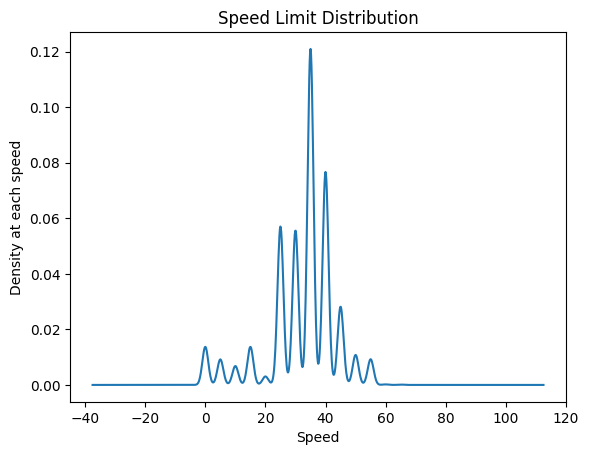

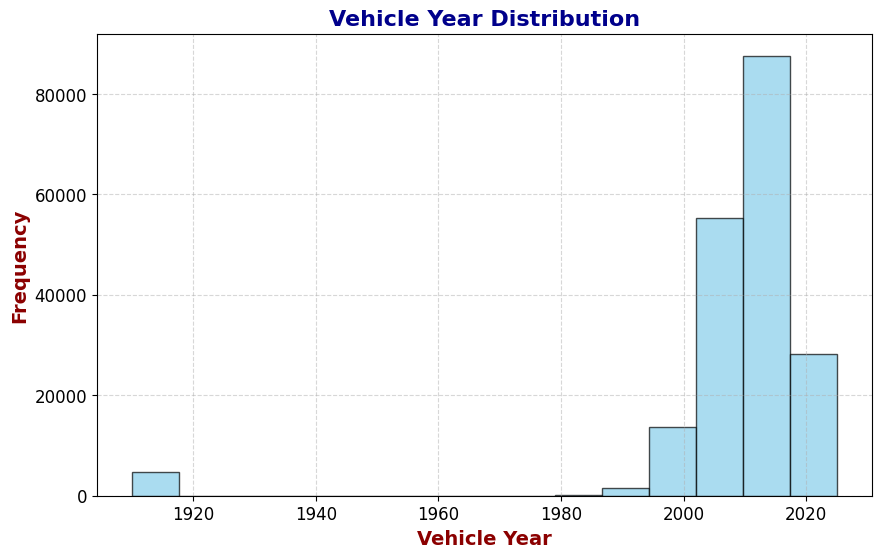

<Figure size 640x480 with 0 Axes>

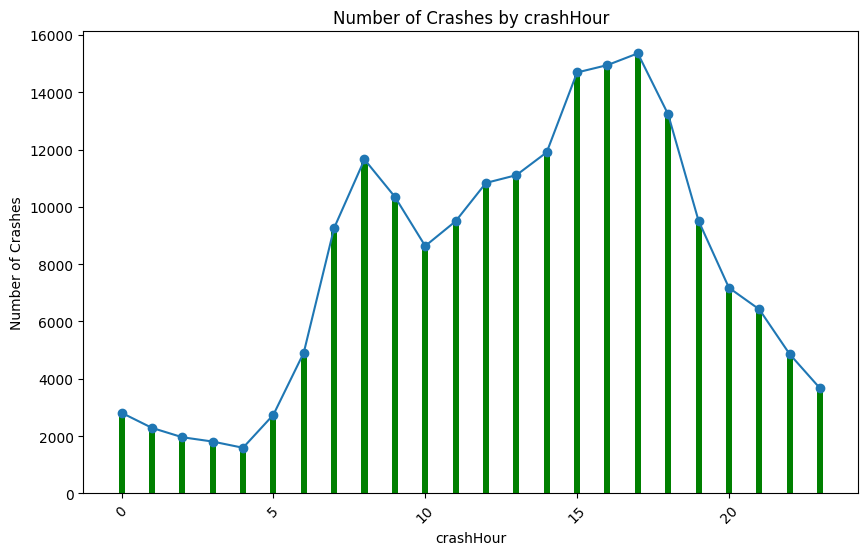

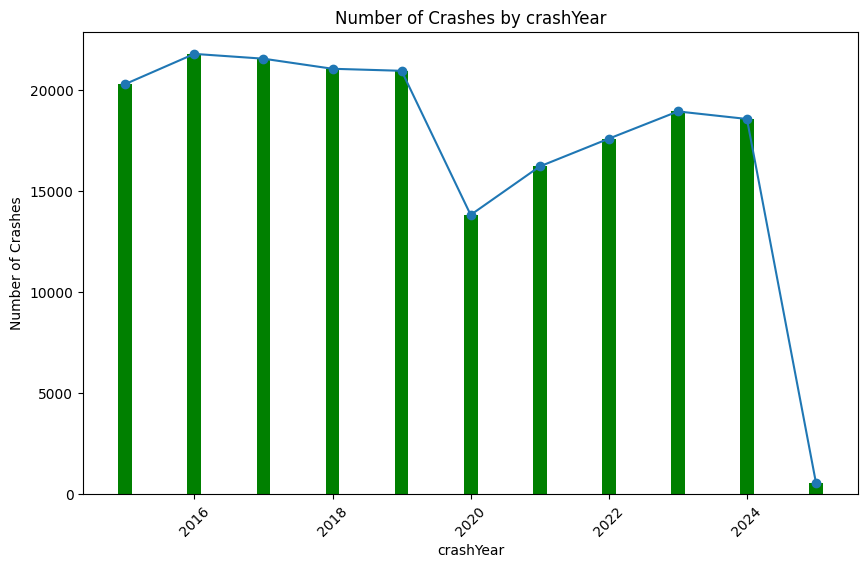

In [20]:
#Speed Limit Distribution: 
#kde plot
plt.figure()
plt.title("Speed Limit Distribution")
new_df['Speed Limit'].plot.kde()
plt.xlabel("Speed")
plt.ylabel("Density at each speed")
plt.show()

# Vehicle Year Distribution
# histogram


plt.figure(figsize=(10, 6), dpi=100)  # Adjust the figure size and resolution
plt.title("Vehicle Year Distribution", fontsize=16, fontweight='bold', color='darkblue')

# Plotting the histogram with better styling
plt.hist(new_df['Vehicle Year'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)

# Labels and styling
plt.xlabel("Vehicle Year", fontsize=14, fontweight='bold', color='darkred')
plt.ylabel("Frequency", fontsize=14, fontweight='bold', color='darkred')

# Customizing grid and tick labels
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()



#crash time analysis
# time series
timeColumns=['crashHour','crashYear']
plt.figure()
for column in timeColumns:
    colCounts=new_df[column].value_counts().sort_index()
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(colCounts.index, colCounts.values, marker='o')
    ax.bar(colCounts.index,colCounts.values,width=0.2,align="center",color='g')
    
    plt.xlabel(column)
    plt.ylabel('Number of Crashes')
    plt.title(f'Number of Crashes by {column}')
    # plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
plt.show()

In [21]:
set(new_df.columns).intersection(set(df.columns))

{'ACRS Report Type',
 'Agency Name',
 'Circumstance',
 'Collision Type',
 'Crash Date/Time',
 'Cross-Street Name',
 'Driver At Fault',
 'Driver Distracted By',
 'Driver Substance Abuse',
 'Driverless Vehicle',
 'Drivers License State',
 'Injury Severity',
 'Latitude',
 'Light',
 'Location',
 'Longitude',
 'Municipality',
 'Parked Vehicle',
 'Person ID',
 'Related Non-Motorist',
 'Route Type',
 'Speed Limit',
 'Surface Condition',
 'Traffic Control',
 'Vehicle Body Type',
 'Vehicle Damage Extent',
 'Vehicle First Impact Location',
 'Vehicle Going Dir',
 'Vehicle ID',
 'Vehicle Make',
 'Vehicle Model',
 'Vehicle Movement',
 'Vehicle Year',
 'Weather'}

### Categorical Feature Visualizations

Below are the visualizations for various categorical features, using bar charts and pie charts to analyze the distribution.

---

#### 1. Most Common Weather Conditions: Bar Chart

The bar chart below shows the frequency of different weather conditions during crashes.

---

#### 2. Surface Condition Distribution: Bar Chart

This bar chart visualizes the distribution of surface conditions during crashes.

---

#### 3. Traffic Control Types: Bar Chart

This bar chart shows the different types of traffic control during accidents.

---

#### 4. Vehicle Body Type Distribution: Bar Chart

This bar chart visualizes the distribution of vehicle body types involved in crashes.

---

#### 6. Vehicle Damage Extent: Pie Chart

This pie chart shows the distribution of vehicle damage extent during the crashes.

---


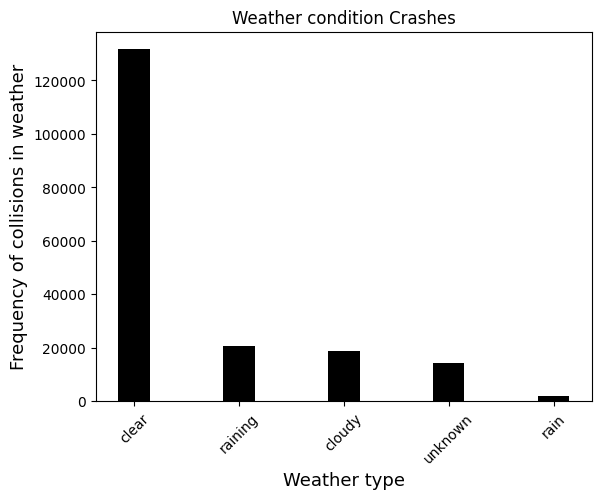

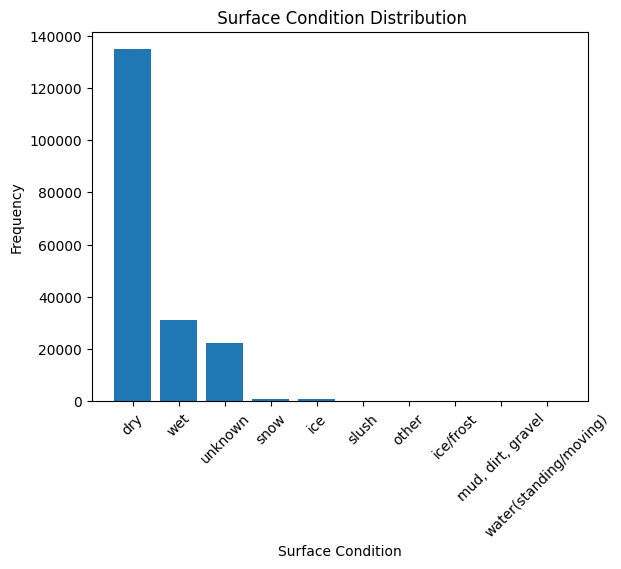

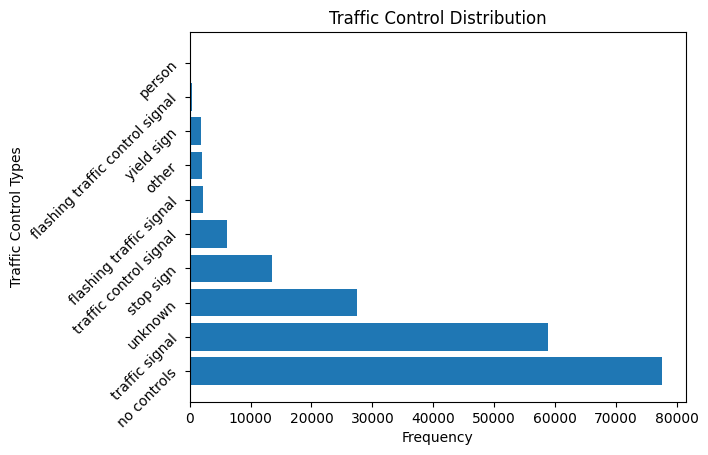

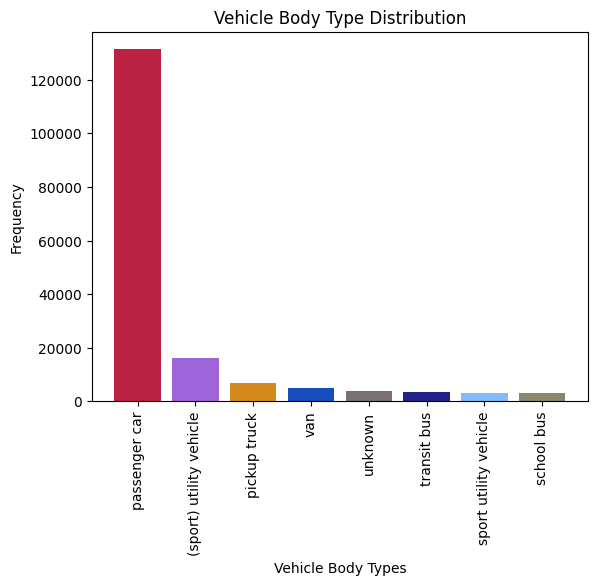

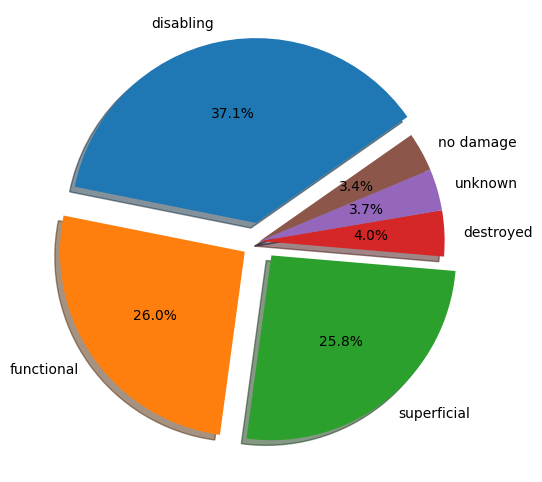

In [22]:
#1. Most Common Weather Conditions: Bar Chart
weatherConditions=new_df['Weather'].value_counts().head(5)
plt.figure()
plt.bar(weatherConditions.index,weatherConditions.values,color='black',width=0.3)
plt.xlabel("Weather type",fontsize=13)
plt.ylabel("Frequency of collisions in weather",fontsize=13)
plt.title("Weather condition Crashes")
plt.xticks(rotation=45)
plt.show()

# Surface Condition Distribution: Bar Chart
surfaceConditions=new_df['Surface Condition'].value_counts().head(10)
plt.bar(surfaceConditions.index,surfaceConditions.values)
plt.title(" Surface Condition Distribution")
plt.xlabel("Surface Condition")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Traffic Control Types
trafficControls=new_df['Traffic Control'].value_counts().head(10)
plt.barh(trafficControls.index,trafficControls.values)
plt.title("Traffic Control Distribution")
plt.ylabel("Traffic Control Types")
plt.xlabel("Frequency")
plt.yticks(rotation=45)
plt.show()

#Vehicle Body Type Distribution
colors=np.random.randint(0, 256, size=(10,3))

vehicleBody=new_df['Vehicle Body Type'].value_counts().head(8)
plt.bar(vehicleBody.index,vehicleBody.values,color=colors/255)
plt.title("Vehicle Body Type Distribution")
plt.ylabel("Frequency")
plt.xlabel("Vehicle Body Types")
plt.xticks(rotation=90)
plt.show()

#Vehicle Damage Extent
plt.figure(figsize=(6,6))
vehicleDamage=new_df['Vehicle Damage Extent'].value_counts().head(6)
plt.pie(vehicleDamage.values,labels=vehicleDamage.index,autopct='%1.1f%%', explode=(0.1,0.1,0.1,0,0,0),shadow=True, startangle=35)
plt.show()


### **3. Bivariate & Multivariate Analysis**
#### **Categorical vs Categorical**
- **Heatmap of Collision Type vs Weather**: Heatmap
- **Stacked Bar Plot for Injury Severity vs Vehicle Type**
- **Heatmap of Driver At Fault vs Surface Condition**
- **Bar Plot for Driver Distraction Causes**

#### **Numerical vs Categorical**
- **Boxplot: Speed Limit vs Injury Severity**
- **Boxplot: Vehicle Year vs Vehicle Damage Extent**
- **Violin Plot: Vehicle Year vs Injury Severity**
- **KDE Plot: Speed Limit Distribution for Different Injury Severity Levels**

#### **Geospatial Analysis**
- **Accident Locations on Map**: Scatter plot using Latitude & Longitude (Folium/Seaborn)
- **Heatmap of Accident Locations**: Using Folium



### **4. Correlation & Feature Importance**
- **Correlation Heatmap** (for numerical variables)
- **Pairplot of Key Numeric Variables** (Seaborn)
- **Feature Importance using RandomForest (for predictions)**

---

### **5. Outlier Detection**
- **Boxplot of Speed Limit**
- **Boxplot of Vehicle Year**
- **Scatter Plot of Speed Limit vs Injury Severity**



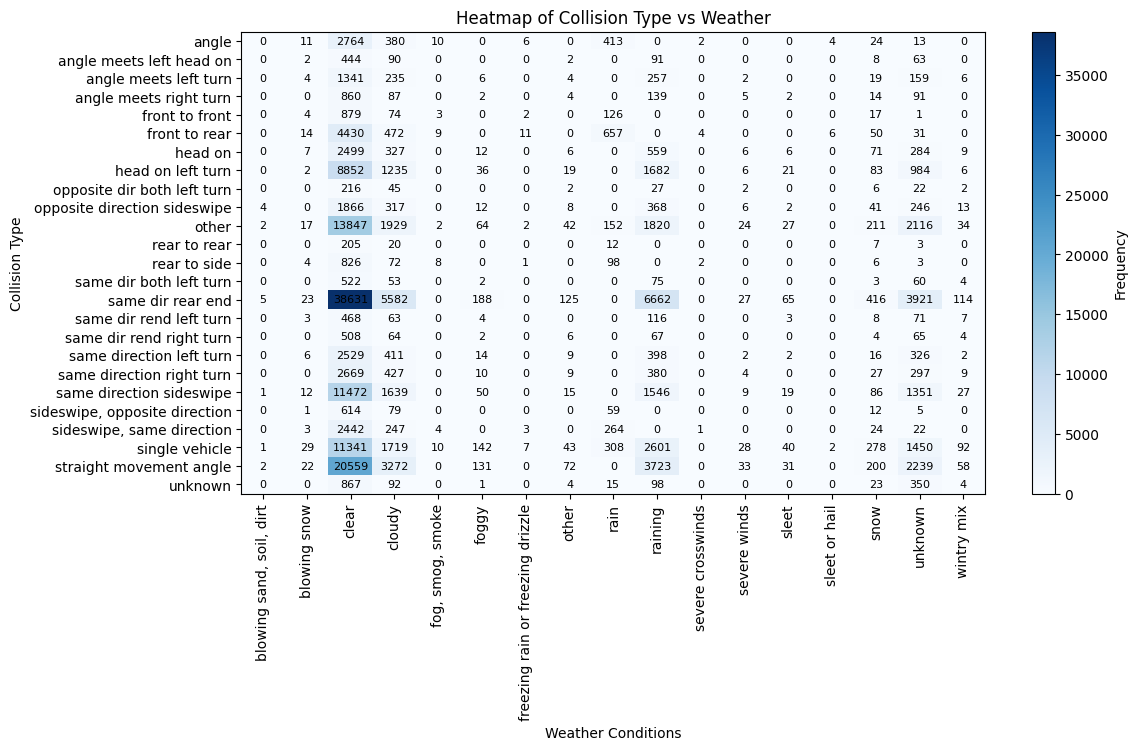

In [23]:
# Heatmap of Collision Type vs Weather: Heatmap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a frequency table (contingency table)
collision_weather_ct = pd.crosstab(new_df['Collision Type'], new_df['Weather'])
# Convert table to numpy array for imshow()
data = collision_weather_ct.values
# Plot heatmap using imshow()
plt.figure(figsize=(12, 6))
heatmap = plt.imshow(data, cmap='Blues', aspect='auto')
# Add colorbar
plt.colorbar(label="Frequency")
# Set x and y labels
plt.xlabel("Weather Conditions")
plt.ylabel("Collision Type")

# Set x and y ticks
plt.xticks(ticks=np.arange(len(collision_weather_ct.columns)), labels=collision_weather_ct.columns, rotation=90)
plt.yticks(ticks=np.arange(len(collision_weather_ct.index)), labels=collision_weather_ct.index)

# Annotate each cell with the numeric values
for i in range(data.shape[0]):  # Iterate over rows
    for j in range(data.shape[1]):  # Iterate over columns
        plt.text(j, i, str(data[i, j]), ha='center', va='center', color="black", fontsize=8)

# Add title
plt.title("Heatmap of Collision Type vs Weather")

# Show plot
plt.show()


### Convert and normalize data types as necessary'

In [24]:
# there is data time column

patterns_dataset=pd.DataFrame(new_df)
new_df['Crash Date/Time']

0        2021-05-27 19:40:00
1        2015-09-11 13:29:00
2        2018-08-17 14:25:00
3        2023-08-11 18:00:00
4        2023-12-06 18:42:00
                 ...        
191204   2025-01-15 15:48:00
191205   2025-01-08 14:16:00
191206   2025-01-05 09:40:00
191207   2025-01-04 11:13:00
191208   2025-01-10 16:50:00
Name: Crash Date/Time, Length: 191209, dtype: datetime64[ns]

In [25]:
#normalize the numeric columns to the range of 0 to 1
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
numericColumns= new_df[["Speed Limit",	"Vehicle Year"]]
scaledData=pd.DataFrame(scaler.fit_transform(numericColumns),columns=numericColumns.columns)
scaledData

,Speed Limit,Vehicle Year
0,-2.888655,0.500478
1,-2.442248,0.203380
2,-1.549434,0.381639
3,-1.549434,0.559898
4,0.236195,0.500478
...,...,...
191204,0.682602,-0.153138
191205,-0.210212,0.619318
191206,-0.656620,-0.212557
191207,-0.656620,-0.569075


### speed limit and year can be scaled and might be helpful in processing for regression type models, but scaling latitude and longitude can distort data 

In [26]:
new_df.select_dtypes(include='number')

,Speed Limit,Vehicle Year,Latitude,Longitude,crashYear,crashHour,crashDay
0,0,2017,38.987657,-76.987545,2021,19,27
1,5,2012,39.039917,-77.053649,2015,13,11
2,15,2015,38.743373,-77.546997,2018,14,17
3,15,2018,39.145873,-77.191940,2023,18,11
4,35,2017,39.025170,-77.076333,2023,18,6
...,...,...,...,...,...,...,...
191204,40,2006,39.237760,-77.278132,2025,15,15
191205,30,2019,39.015534,-77.042577,2025,14,8
191206,25,2005,38.992523,-77.036283,2025,9,5
191207,25,1999,38.977535,-77.077075,2025,11,4


## Encode categorical variables if present


In [27]:
# visualize the categories of categorical data to identify the encoding method 
import matplotlib.pyplot as plt
for columnName in objectTypeColumnNames:
    print(columnName,len(new_df[columnName].value_counts()))


Agency Name 10
ACRS Report Type 3
Crash Date/Time 105049
Route Type 19
Cross-Street Name 7289
Collision Type 25
Weather 17
Surface Condition 13
Light 11
Traffic Control 28
Driver Substance Abuse 20
Person ID 191209
Driver At Fault 3
Injury Severity 6
Driver Distracted By 24
Drivers License State 78
Vehicle ID 191209
Vehicle Damage Extent 8
Vehicle First Impact Location 33
Vehicle Body Type 51
Vehicle Movement 27
Vehicle Going Dir 10
Driverless Vehicle 2
Parked Vehicle 2
Vehicle Make 1943
Vehicle Model 7022
Location 106838


### there are too many categories in some of the columns to encode , so we follow different methods for each range of columns as follows:


### Choosing the Right Approach

- **Low-Cardinality Data:**  
  One-hot or ordinal encoding is usually sufficient.

- **High-Cardinality Data:**  
  Consider frequency encoding, hash encoding, or learned embeddings to avoid exploding the feature space.

- **No Target Variable:**  
  Since there is no target, focus on methods that preserve as much information as possible about the distribution and relationships of categories in your unsupervised data. Sometimes you might also perform dimensionality reduction (like PCA) after encoding to further manage feature space size.

By selecting the right encoding strategy for each feature based on its characteristics (cardinality, inherent order, etc.), you can effectively preprocess unsupervised data for methods such as clustering or anomaly detection.

In [28]:

low_cardinality=[]
High_Cardinality=[]

for columnName in objectTypeColumnNames:
    if len(new_df[columnName].value_counts()) < 5:
        low_cardinality.append(columnName)
    else:
        High_Cardinality.append(columnName)
High_Cardinality.remove('Crash Date/Time')
low_cardinality, High_Cardinality

(['ACRS Report Type',
  'Driver At Fault',
  'Driverless Vehicle',
  'Parked Vehicle'],
 ['Agency Name',
  'Route Type',
  'Cross-Street Name',
  'Collision Type',
  'Weather',
  'Surface Condition',
  'Light',
  'Traffic Control',
  'Driver Substance Abuse',
  'Person ID',
  'Injury Severity',
  'Driver Distracted By',
  'Drivers License State',
  'Vehicle ID',
  'Vehicle Damage Extent',
  'Vehicle First Impact Location',
  'Vehicle Body Type',
  'Vehicle Movement',
  'Vehicle Going Dir',
  'Vehicle Make',
  'Vehicle Model',
  'Location'])

In [29]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# print(low_cardinality,new_df[low_cardinality])
one_hot_encoded=encoder.fit_transform(new_df[low_cardinality])

one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(low_cardinality))
encoded_new_df=pd.concat([new_df, one_hot_df], axis=1)
for col in High_Cardinality:
    new_df[col]=new_df[col].map(new_df[col].value_counts())
   
new_df=pd.concat([new_df,encoded_new_df],axis=1)
new_df

,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Cross-Street Name,Collision Type,Weather,Surface Condition,Light,Traffic Control,...,ACRS Report Type_Fatal Crash,ACRS Report Type_Injury Crash,ACRS Report Type_Property Damage Crash,Driver At Fault_no,Driver At Fault_unknown,Driver At Fault_yes,Driverless Vehicle_No,Driverless Vehicle_Unknown,Parked Vehicle_No,Parked Vehicle_Yes
0,2993,Property Damage Crash,2021-05-27 19:40:00,18708,27907,20289,131651,22418,129261,77603,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,26812,Property Damage Crash,2015-09-11 13:29:00,18708,27907,20289,131651,22418,129261,77603,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,138376,Property Damage Crash,2018-08-17 14:25:00,18708,27907,20289,131651,22418,129261,27426,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,7841,Injury Crash,2023-08-11 18:00:00,18708,27907,18091,131651,22418,129261,77603,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,138376,Property Damage Crash,2023-12-06 18:42:00,77077,22,30342,131651,134697,39551,13593,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191204,26812,Injury Crash,2025-01-15 15:48:00,6474,27907,5684,131651,134697,129261,77603,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
191205,26812,Injury Crash,2025-01-08 14:16:00,6474,5,1106,131651,134697,129261,77603,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
191206,26812,Property Damage Crash,2025-01-05 09:40:00,6474,329,3627,131651,134697,129261,6199,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
191207,26812,Property Damage Crash,2025-01-04 11:13:00,6474,27907,3010,131651,134697,129261,77603,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
